# Performing the Paired Difference T-test to test the blood pressure results before and after the intervention are statistically significant

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import scale

from scipy import stats
import researchpy as rp

In [3]:
bp_reading = pd.read_csv('datasets/blood_pressure.csv')
bp_reading.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [4]:
bp_reading.shape

(120, 5)

In [6]:
bp_reading.describe().T

,count,mean,std,min,25%,50%,75%,max
patient,120.0,60.500000,34.785054,1.0,30.75,60.5,90.25,120.0
bp_before,120.0,156.450000,11.389845,138.0,147.00,154.5,164.00,185.0
bp_after,120.0,151.358333,14.177622,125.0,140.75,149.5,161.00,185.0


**Objective**

Using p-test to see if whether the difference in the mean differ after or before the intervention is statistically significant.

<AxesSubplot:>

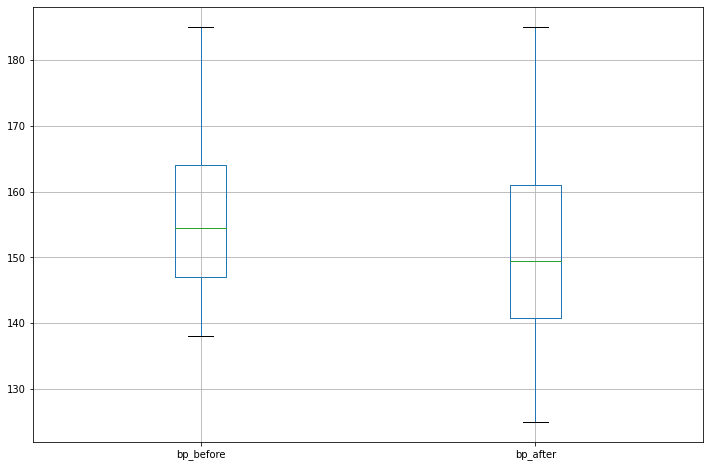

In [7]:
bp_reading[['bp_before', 'bp_after']].boxplot(figsize=(12, 8))

In [8]:
stats.levene(bp_reading['bp_after'], bp_reading['bp_before'])

LeveneResult(statistic=4.863729003161597, pvalue=0.028383666362347747)

The p-value is 2% which means the variance is different across these two samples. Levenes test tells us that we can't use Independet T-test to test the differences in the means between these two samples of data. And we need to use another test.

In [9]:
## Caclulating the residuals (difference)

bp_reading['bp_diff'] = scale(bp_reading['bp_after'] - bp_reading['bp_before'])
bp_reading.head()

,patient,sex,agegrp,bp_before,bp_after,bp_diff
0,1,Male,30-45,143,153,0.906743
1,2,Male,30-45,163,170,0.726496
2,3,Male,30-45,153,168,1.207155
3,4,Male,30-45,153,142,-0.354987
4,5,Male,30-45,146,141,0.005508


Seeing if these residuals are normally distributed using histogram

array([[<AxesSubplot:title={'center':'bp_diff'}>]], dtype=object)

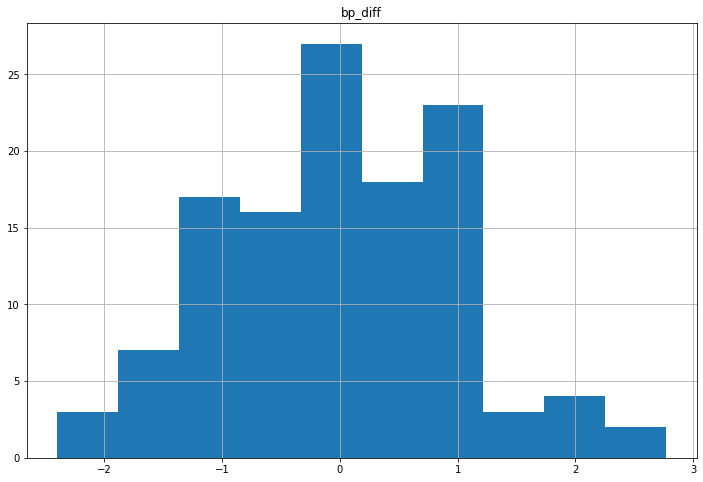

In [10]:
bp_reading[['bp_diff']].hist(figsize=(12, 8))

Using Q-Q plot to see if the distribution is normal or not.

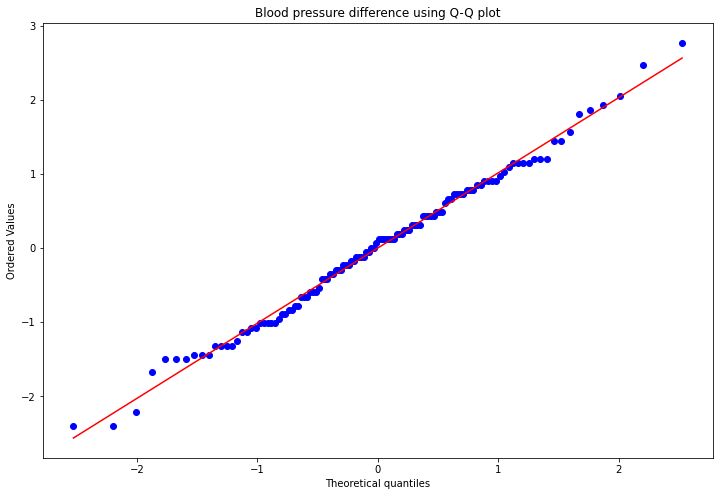

In [11]:
plt.figure(figsize=(12, 8))
stats.probplot(bp_reading['bp_diff'], plot=plt)
plt.title('Blood pressure difference using Q-Q plot')
plt.show()

Again performing Shapiro Test

In [12]:
stats.shapiro(bp_reading['bp_diff'])


(0.9926842451095581, 0.7841846942901611)

Here, the residuals are normally distributed because the results are not significant as the p-value is 78%.

Using the *rel* function of SciPy library to perform independent test.

In [13]:
stats.ttest_rel(bp_reading['bp_after'], bp_reading['bp_before'])

Ttest_relResult(statistic=-3.3371870510833657, pvalue=0.0011297914644840823)

The p-value is very much under the 5% threshold which means the test is significant.

Since the above tests are not reliable, we further test with researchpy library

In [14]:
rp.ttest(bp_reading['bp_after'], bp_reading['bp_before'],
        paired=True, equal_variances=False)

,Wilcoxon signed-rank test,results
0,Mean for bp_after =,151.358333
1,Mean for bp_before =,156.450000
2,W value =,2234.500000
3,Z value =,-3.191600
4,Two sided p value =,0.001400
5,r =,-0.206000


Wilcoxon signed-rank test compares the medians between the two samples rather than the mean. 

The **W value** and **p value** tells that the differences in the medians between the paired samples are significant. The intervention performed had an impact on the individuals blood pressures.